# <span style="color:#ff5f27">👨🏻‍🏫 Vehicle Sales Price Predictions - Part 1 of 3 </span>

## BEFORE WE START

This dataset can be downloaded to your PC from 
* [the following Google Drive link](https://drive.google.com/file/d/1GoXwFQCbKE0o32VE44G1NhpsvfPtX2d0/view?usp=drive_link)
* [this dowload location](https://repo.hops.works/dev/jdowling/car_prices.csv)

The original dataset can be found on [this Kaggle repository](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data).

In order to make a *machine learning system* from this dataset, we have structured the service into 3 pipelines:
1. feature engineering pipeline notebook
2. training pipeline notebook
3. inferencing pipeline notebook

This notebook will start at the first step, ie. the feature engineering pipeline.

---

## <span style="color:#ff5f27">👩🏻‍🔬 FEATURE ENGINEERING PIPELINE </span>
This is the first step of building our machine learning system. 

## <span style="color:#ff5f27">🗄️ Data Loading </span>
We have a dataset available at the above locations. How can we import this into a python variable.

In [1]:
# Import the necessary libraries
import pandas as pd

#  Path to the source CSV file
# file_path = "https://repo.hops.works/dev/jdowling/car_prices.csv"
file_path = "./car_prices.csv"

# Read the source file and store in variable "data"
data = pd.read_csv(file_path)

## <span style="color:#ff5f27">👨🏻‍🎨 Data Visualization</span>

#### I want to visualise the file. How can I see the names of the columns with the 5 first values?

In [2]:
# Show the name of the columns
print("Name of the columns:")
print(data.columns)

# Show the first 5 values
print("First 5 values:")
print(data.head())

Name of the columns:
Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')
First 5 values:
   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    bl

#### How can I see how much data and how many variables (with their names and types) are available in the dataset?

In [3]:
# Show info about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB
None


#### Show the possible values of the numeric values in the dataset.

In [4]:
# Select non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['float', 'int']).columns

# Afficher les valeurs uniques dans ces colonnes
for column in non_numeric_columns:
    print(column, data[column].unique())

make ['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']
model ['Sorento' '3 Series' 'S60' '6 Series Gran Coupe' '

#### How can we see if there are missing data or null values, and in which columns they reside, in the dataset?

In [5]:
# Check if there are missing values or null-values in every column of the dataset
missing_values_per_column = data.isnull().sum()

# Display the columns with missing or null values
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
print("Columns with missing or null values:")
print(columns_with_missing_values)

Columns with missing or null values:
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
condition       11820
odometer           94
color             749
interior          749
mmr                38
sellingprice       12
saledate           12
dtype: int64


#### Print a distribution chart for the values of the column "sellingprice"

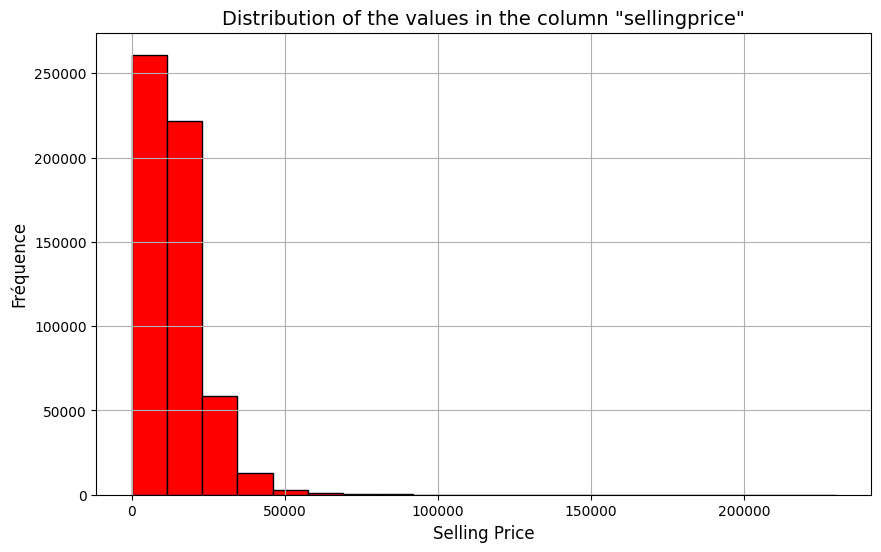

In [6]:
import matplotlib.pyplot as plt

# Parameters of the chart
plt.figure(figsize=(10, 6))  # Defines the size of the figure

# Trace the histogram
plt.hist(data['sellingprice'], bins=20, color='red', edgecolor='black')  # Use 20 bins (bars)

# Titles and labels
plt.title('Distribution of the values in the column "sellingprice"', fontsize=14)
plt.xlabel('Selling Price', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Show the graphic
plt.grid(True)  # Add a grid
plt.show()

#### What are the possible values of the column "year" ?

In [7]:
# Find the unique values in the "year" column
values_year = data['year'].unique()

#  Show the unique values
print("Unique values in the 'year' column:")
print(sorted(values_year))

Unique values in the 'year' column:
[1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


#### What are the possible values in the "make" column?

In [8]:
# Find the unique values in the "make" column
values_make = data['make'].unique()

# Show the unique values
print("Show the unique values in the 'make' column :")
print(values_make)

Show the unique values in the 'make' column :
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']


#### What are the possible values in the "trim" column?

In [9]:
# Find the unique values in the "trim" column
values_trim = data['trim'].unique()

# Show the unique values
print("Unique values in the 'trim' column:")
print(list(values_trim))

Unique values in the 'trim' column:
['LX', '328i SULEV', 'T5', '650i', '2.5 S', 'Base', '1LT', '2.0T Premium Plus quattro', 'LT', '3.0T Prestige quattro', 'SE', '2LT', 'LS', 'LTZ', '528i', '1.8 TFSI Premium', 'T6', 'sDrive35i', '3.0T Premium Plus quattro', 'Premium Plus quattro', 'Convenience Group', 'xDrive35i', 'Technology Package', 'Luxury', '1.6 SL', '1.6 SV', 'L 3.0T quattro', 'sDrive28i', '750Li', 'Leather Group', 'quattro', '428i SULEV', 'Work Truck', 'Advance and Entertainment Packages', '535d', 'G37 Sport', 'G37 Journey', 'FX37', 'Limited', '5.0 R-Spec', 'Signature', 'GLS', 'Sport', 'Sport 2.0T', 'Turbo', 'GS', 'Ultimate', '3.8', '3.8 Track', 'Unlimited Rubicon', 'EX Hybrid', '2.5', 'S550', 'C250', 'SX', 'Unlimited Sahara', 'C250 Sport', 'Touring', 'M37', '+', 'LE', 'SLK350', 'E350 Sport', 'i SV', 'Latitude', 'i Touring', 'JX35', 'G37x', 'HSE LUX', 'EX', 'i Sport', 'Pure Plus', 'L', 'GLK350', 'Unlimited Sport', 'E350 Sport BlueTEC', 'Pure', 'awd v6', 'GL450 4MATIC', 'ML350', '

## <span style="color:#ff5f27">🛁 Data Cleaning</span>

The dataet has the variables `vin`, `state`, `mmr` in it. We will remove these from the dataset.

In [10]:
# Remove specific columns of the dataset
df = data.drop(['vin', 'state', 'mmr'], axis=1)

# Check if the columns have been removed
if all(col not in df.columns for col in ['vin', 'state', 'mmr']):
    print("The columns 'vin', 'state', 'mmr', 'seller' have been succesfully removed.")
else:
    print("The columns were not deleted correctly. Make sure the column names are correct.")

The columns 'vin', 'state', 'mmr', 'seller' have been succesfully removed.


Remove all the missing data or `null` values from the dataset.

In [11]:
# Number of lines before deletion
num_rows_before = df.shape[0]

# Delete all rows with missing or zero data
df1 = df.dropna()

# Number of lines after deletion
num_rows_after = df1.shape[0]

# Number of lines deleted
num_rows_deleted = num_rows_before - num_rows_after

print(f"Number of lines deleted: {num_rows_deleted}")

Number of lines deleted: 86512


In [12]:
# Additional changes to the dataframe wrt the "saledate" column: this will be necessary for our import into Hopsworks

from datetime import datetime, timezone

def convert_to_datetime_utc(date_str):
    try:
        # Remove the timezone abbreviation
        date_str = date_str.split(' (')[0]
        # Convert to datetime with timezone information
        dt_with_tz = datetime.strptime(date_str, '%a %b %d %Y %H:%M:%S GMT%z')
        # Convert to UTC and then remove timezone info
        dt_utc = dt_with_tz.astimezone(timezone.utc).replace(tzinfo=None)
        return dt_utc
    except Exception as e:
        print(f"Error converting date: {date_str} - {e}")
        return pd.NaT

# Apply the conversion function to the date_column
df1['saledate'] = df1['saledate'].apply(lambda x: convert_to_datetime_utc(x) if pd.notna(x) else pd.NaT)
df1

/var/folders/yp/z0pz6z2j49g_bdh9zzznhvcr0000gp/T/ipykernel_15221/3910274227.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['saledate'] = df1['saledate'].apply(lambda x: convert_to_datetime_utc(x) if pd.notna(x) else pd.NaT)


,year,make,model,trim,body,transmission,condition,odometer,color,interior,seller,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,black,kia motors america inc,21500.0,2014-12-16 20:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393.0,white,beige,kia motors america inc,21500.0,2014-12-16 20:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,45.0,1331.0,gray,black,financial services remarketing (lease),30000.0,2015-01-15 12:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,41.0,14282.0,white,black,volvo na rep/world omni,27750.0,2015-01-29 12:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,43.0,2641.0,gray,black,financial services remarketing (lease),67000.0,2014-12-18 20:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,22800.0,2015-07-07 13:15:00
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,5.0,54393.0,white,black,i -5 uhlmann rv,30800.0,2015-07-08 16:30:00
558834,2012,BMW,X5,xDrive35d,SUV,automatic,48.0,50561.0,black,black,financial services remarketing (lease),34000.0,2015-07-08 16:30:00
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,11100.0,2015-07-09 13:45:00


#### What is the average in the "sellingprice" column, what is the smallest and largest value?

In [13]:
# Calculation of the average in the "sellingprice" column
avg_sellingprice = df1['sellingprice'].mean()
print("Average of the column 'sellingprice' :", avg_sellingprice)

# Smallest value in the "sellingprice" column
min_sellingprice = df1['sellingprice'].min()
print("Smallest value of the column 'sellingprice' :", min_sellingprice)

# Largest value in the "sellingprice" column
max_sellingprice = df1['sellingprice'].max()
print("Largest value in the column 'sellingprice' :", max_sellingprice)

Average of the column 'sellingprice' : 13690.51205843434
Smallest value of the column 'sellingprice' : 1.0
Largest value in the column 'sellingprice' : 230000.0


#### Clears all data with a value less than or equal to 1000 or greater than 50000 in the "sellingprice" column. Also tell me how much data was deleted.

In [14]:
# Count the number of data before deletion
lines_before = len(df1)

# Clear data with value smaller than 1000 or greater than 50000 in "sellingprice" column
df2 = df1[(df1['sellingprice'] > 1000) & (df1['sellingprice'] < 50000)]

# Count the number of data after deletion
lines_after = len(df2)

# Calculate the number of erased data
lines_removed = lines_before - lines_after

# Show number of erased data
print("Number of removed lines :", lines_removed)


Number of removed lines : 16001


#### The dataset has an "interior" column and a "color" column. Are there any missing, null, equal to "—" or numeric values ​​in this column? if yes, delete this data from the dataset and tell me how much data was deleted

In [15]:
# Count the number of data before deletion
lines_before = len(df2)

# Clear data with missing, zero, or "—" values ​​in the "interior" and "color" columns
df3 = df2[(df2['interior'] != '—') & (df2['color'] != '—') & (df2['interior'].notnull()) & (df2['color'].notnull())]

# Count the number of data after deletion
lines_after = len(df3)

# Calculate the number of erased data
lines_removed = lines_before - lines_after

# Show number of removed lines
print("Number of removed lines:", lines_removed)

Number of removed lines: 30723


## <span style="color:#ff5f27"> 📡 Connecting to Hopsworks Feature Store </span>

In [ ]:
# Install the Hopsworks client library in the runtime. This will be used to connect to Hopsworks.
## Note that in Colab, this will throw an error but the system will still work.
!pip install --quiet hopsworks

In [16]:
# data.to_csv('dataset_cleaned.csv', index=False)
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Multiple projects found. 

	 (1) Car_Prices
	 (2) rixdemo
	 (3) GraphEmbeddingsDemo
	 (4) BeerVolumePrediction

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/818324
2024-07-02 14:07:24,747 WARNING: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead

2024-07-02 14:07:24,748 WARNING: using legacy validation callback
Connected. Call `.close()` to terminate connection gracefully.


### <span style="color:#ff5f27">🪄 Creating Feature Groups</span>

Insert the dataset into a Hopsworks Feature Group.

In [17]:
# Create a feature group in Hopsworks based on the above dataframe
fg = fs.get_or_create_feature_group(
    name="car_prices",
    version=2,
    description="The price of cars",
    primary_key=["seller", "saledate"],
    event_time="saledate",
)
fg.insert(df3)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/818324/fs/814147/fg/960856


Uploading Dataframe: 0.00% |          | Rows 0/425601 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: car_prices_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/818324/jobs/named/car_prices_2_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x313fbb6e0>, None)

This completes the Feature Engineering pipeline of our demo project. We can now proceed to the Training Pipeline of the project.

---